# Wine Reviews 数据集


该数据集有129971条数据，13个属性标签，分别为

country：产出国

description：描述

designation：葡萄酒名称

points：度数

price：价格

province：产出省

region_1：产出区域1

region_2：产出区域2

taster_name：品鉴师

taster_twitter_handle：品鉴师推特号

title：品鉴师所获荣誉

variety：品种

winery：酒厂


In [61]:
import os
import sys
import math
import pandas as pd
import numpy as np
import csv
import json
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

In [4]:
wine1_data = pd.read_csv('.\data\Wine Reviews\winemag-data-130k-v2.csv',index_col = 0)
wine1_data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [15]:
wine1_data.shape

(129971, 13)

In [14]:
cols = list(wine1_data)
cols

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

## 数据摘要
### 对标称数据计算频数
标称属性包括：'country' , 'designation', 'province', 'region_1', 'region_2', 'taster_name' , 'taster_twitter_handle'，'variety', 'winery',分别计算它们的频数

In [25]:
nominal_attribute = ['country','designation','province','region_1','region_2','taster_name','taster_twitter_handle','variety','winery']
for tmp in nominal_attribute:
    print(wine1_data[tmp].value_counts())
    print('-' * 60)

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

- 从数据中发现，美国为最大产出国
- California是最大的产出州
- 名字为Roger Voss的品鉴师，品鉴次数最多，他的推特号为@vossroger
- Pinot Noir种类最多

### 对数值数据计算五数概括以及缺失值

In [27]:
number_data = ['points','price']
wine1_data[number_data].describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [41]:
wine1_data.isnull()[number_data].sum()

points       0
price     8996
dtype: int64

数值数据包括'point' 和 'price'
- point：最大100、最小80、Q1值86、中位数88、Q3值91，缺失值个数为0
- price：最大3300、最小4、Q1值17、中位数25、Q3值42，缺失值个数为0

## 数据可视化


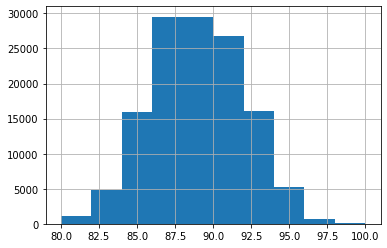

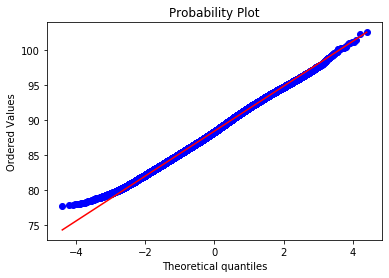

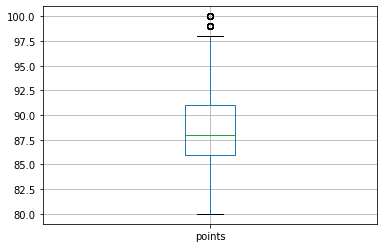

In [105]:

wine1_data['points'].hist()

points = wine1_data['points'].dropna()
points = points.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(points, plot=plt)
plt.show()

wine1_data.boxplot(column=['points'])

我们可以发现'points'数据符合正态分布

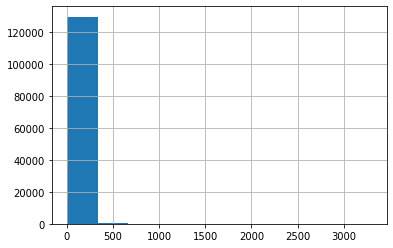

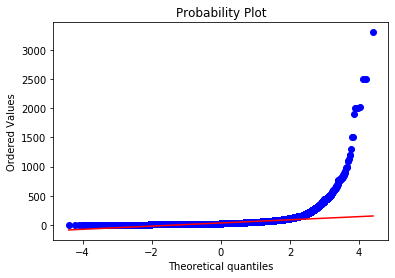

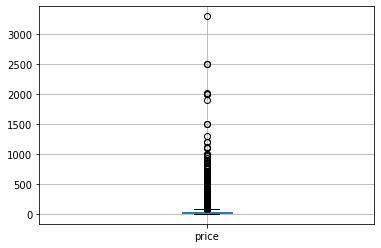

In [106]:
wine1_data['price'].hist()

price = wine1_data['price'].dropna()
price = price.apply(lambda x: x + np.random.normal())

fig = plt.figure()
res = stats.probplot(price, plot=plt)
plt.show()

wine1_data.boxplot(column=['price'])

'price' 数据符合正态分布，高价的酒较少，价格主要集中在中低价位

## 数据缺失的处理

In [43]:
wine1_data.isnull()[cols].sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

- 对于country和province的缺失，可能无法确定该葡萄酒的产出国
- taster_name缺失可能说明该葡萄酒没有品酒师去品鉴
- taster_twitter_handle缺失说明品酒师没有获得任何荣誉称号

### 将缺失部分剔除

In [44]:
delete_wine1 = wine1_data.dropna()

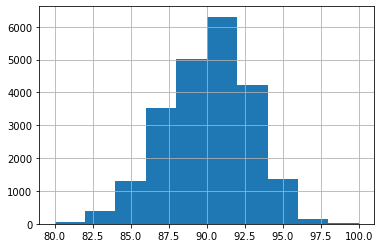

In [47]:
delete_wine1['points'].hist()

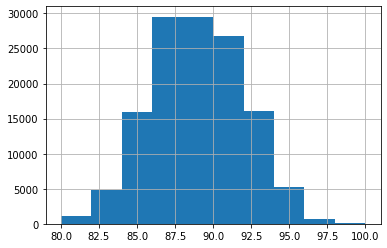

In [48]:
wine1_data['points'].hist()

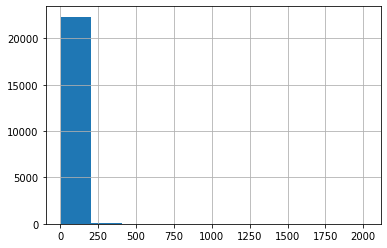

In [49]:
delete_wine1['price'].hist()

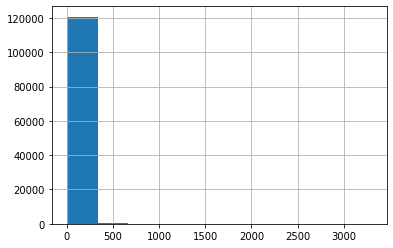

In [50]:
wine1_data['price'].hist()

剔除缺失值后，prices的分布没有太多改变

### 用最高频率值来填补缺失值

In [52]:
fill_max = wine1_data.fillna({'points': wine1_data['points'].mode().item(), 'price': wine1_data['price'].mode().item()})

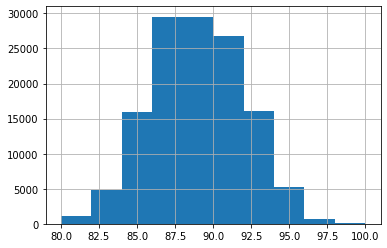

In [53]:
fill_max['points'].hist()

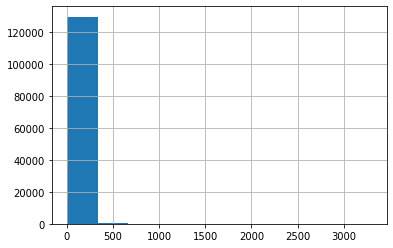

In [54]:
fill_max['price'].hist()

### 通过属性的相关关系来填补缺失值
首先计算属性之间的相关系数

In [59]:
x = wine1_data.corr()
print(x)

          points     price
points  1.000000  0.416167
price   0.416167  1.000000


只有price和points为数值属性，虽然相关性为中，但是points没有缺失数据，可以根据已有的points和price数据，得到它们的回归方程，利用回归方程计算缺失值

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258234C2888>,
      dtype=object)

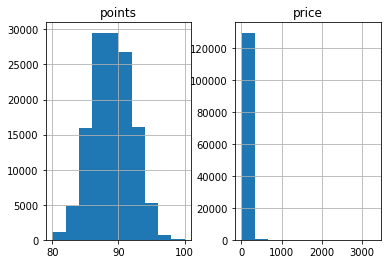

In [108]:
# 进行回归
points = wine1_data['points']
price = wine1_data['price']
model = sm.OLS(price,points).fit()
new_data = wine1_data
for i in range(len(new_data)):
    if(np.isnan(new_data['price'][i])):
        new_data.loc[i,'price'] = model.predict(new_data['points'][i])
number_data = ['points','price']
new_data.hist()

In [109]:
new_data[number_data].describe()

,points,price
count,129971.000000,129970.000000
mean,88.447138,35.447080
std,3.039730,41.080914
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


填充后，price只有均值和标准差发生变化，均值减小。
### 通过数据对象之间的相似性来填补缺失值
根据对象之间ponits的相似性，填充缺失的price

In [ ]:
df_sim = wine1_data[['price','points']]
p = {}
for row in df_sim.iterrows():
    if p.get(row[1]['points'], None):
        if not np.isnan(row[1]['price']):
            p[row[1]['points']][0] += row[1]['price']
            p[row[1]['points']][1] += 1
    else:
        if not np.isnan(row[1]['price']):
            p[row[1]['points']] = [row[1]['price'], 1]
for k in p.keys():
    p[k][0] = round(p[k][0] / p[k][1], 4)
for i in range(len(df_sim['price'])):
    if (np.isnan(df_sim['price'][i])):
        da = p[df_sim.loc[i, 'points']][0]
        df_sim.loc[i, 'price']  = da

In [104]:
number_data = ['points','price']
df_sim[number_data].describe()

,points,price
count,129971.000000,129971.000000
mean,88.447138,35.446999
std,3.039730,41.080766
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


填充后，price只有均值和标准差发生变化，均值增大。